# Notebook analyzing a data set of the winners of the Nobel Prize 

Notebook taken from online course

## Importing Statements

In [5]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [6]:
data = pd.read_csv("nobel_prize_data.csv")

## Data exploration

### Shape of the data

In [7]:
rows, cols = data.shape
print(f"The data has {rows} rows and {cols} columns.")

The data has 962 rows and 16 columns.


### Columns name and data type

In [8]:
print(f"The coloumns are:")
for item in data.columns:
    print(item)

The coloumns are:
year
category
prize
motivation
prize_share
laureate_type
full_name
birth_date
birth_city
birth_country
birth_country_current
sex
organization_name
organization_city
organization_country
ISO


In [9]:
print("The type of data within the columns are:")
print(data.dtypes)

The type of data within the columns are:
year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object


### First and last years

In [10]:
data.sort_values(["year"])

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
951  2020   Chemistry               The Nobel Prize in Chemistry 2020   
950  2020   Chemistry               The Nobel Prize in Chemistry 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
954  2020  Literature              The Nobel Prize in Literature 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
951  “for the development of a method for genome ed...         1/2   
950  “for the development of a method for genome ed...         1/2   
960  “for the discovery of a supermassive compact o...         1/4   
954  “for her unmistakable poetic voice that with a...         1/1   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name  birth_date  \
0      Individual  Jacobus Henricus van 't Hoff  1852-08-30   
1      Individual               Sully Prudhomme  1839-03-16   
2      Individual        Emil Adolf von Behring  1854-03-15   
3      Individual                Frédéric Passy  1822-05-20   
4      Individual             Jean Henry Dunant  1828-05-08   
..            ...                           ...         ...   
951    Individual            Jennifer A. Doudna  1964-02-19   
950    Individual        Emmanuelle Charpentier  1968-12-11   
960    Individual               Reinhard Genzel  1952-03-24   
954    Individual                  Louise Glück  1943-04-22   
961    Individual                 Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
951            Washington, DC  United States of America   
950           Juvisy-sur-Orge                    France   
960  Bad Homburg vor der Höhe                   Germany   
954              New York, NY  United States of America   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
951  United States of America  Female  University of California   
950                    France  Female       Max-Planck-Institut   
960                   Germany    Male  University of California   
954  United States of America  Female                       NaN   
961            United Kingdom    Male      University of Oxford   

    organization

In [11]:
print(f"The first year is: {data.sort_values(['year'])['year'][0]}")
print(f"The last year is: {data.sort_values(['year'])['year'].iloc[-1]}")

The first year is: 1901
The last year is: 2020


## Cleaning the data

### Finding duplicates

In [12]:
if data[data.duplicated()].empty:
    print("No duplicates found")
else:
    print("Duplicated are: ")
    data[data.duplicated()]

No duplicates found


### Finding NaN values

In [13]:
data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

The information on organizations tend to have a lot of missing values! Maybe the Nobel prize did not work for an organization?

### Converting birthday to date_time object and prize_share to percentage

In [14]:
data["birth_date"] = pd.to_datetime(data["birth_date"])

In [15]:
data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

In [16]:
data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [17]:
a = pd.DataFrame([int(item[0]) for item in data["prize_share"]])
b = pd.DataFrame([int(item[2]) for item in data["prize_share"]])
data["prize_pct"] = a/b
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

## Men vs Women

Let us check the men vs women winners per year!
First, year to number convertion.

In [18]:
data["year"] = data["year"].astype(int)

Next, plotting a pie chart! 

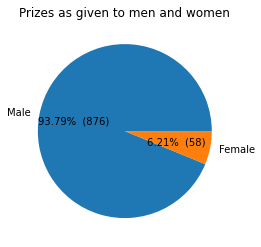

In [19]:
gender = data.sex.value_counts()
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(x=gender.values,
       labels=gender.index,
        autopct=make_autopct(gender.values)
       )
plt.title("Prizes as given to men and women")
plt.show()

How many men vs women has won the prize pver the years?

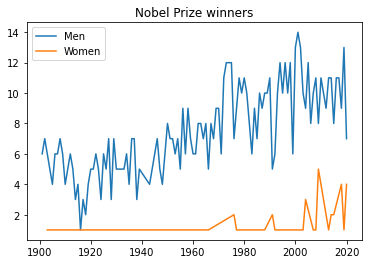

In [26]:
male_time = data[data['sex']=='Male'].groupby(['year']).count()
woman_time = data[data['sex']=='Female'].groupby(['year']).count()
plt.plot(male_time['sex'], label='Men')
plt.plot(woman_time['sex'], label='Women')
plt.legend()
plt.title('Nobel Prize winners')
plt.show()

There has been always a woman winning the prize. Only at about 1970 there has been moew than 1. 

### Three first female laureates

In [18]:
data[data['sex']=='Female'].sort_values(['year']).head(3)[['full_name', 'prize', 'birth_country', 'organization_name']]

full_name  \
18                        Marie Curie, née Sklodowska   
29  Baroness Bertha Sophie Felicita von Suttner, n...   
51                      Selma Ottilia Lovisa Lagerlöf   

                                 prize                     birth_country  \
18     The Nobel Prize in Physics 1903           Russian Empire (Poland)   
29          The Nobel Peace Prize 1905  Austrian Empire (Czech Republic)   
51  The Nobel Prize in Literature 1909                            Sweden   

   organization_name  
18               NaN  
29               NaN  
51               NaN

### Those who won the Nobel Prize more than once

In [19]:
data[data['full_name'].duplicated(keep=False)].sort_values(['full_name'])[['prize', 'full_name', 'organization_name']]

prize  \
89          The Nobel Peace Prize 1917   
215         The Nobel Peace Prize 1944   
348         The Nobel Peace Prize 1963   
306  The Nobel Prize in Chemistry 1958   
505  The Nobel Prize in Chemistry 1980   
297    The Nobel Prize in Physics 1956   
424    The Nobel Prize in Physics 1972   
278  The Nobel Prize in Chemistry 1954   
340         The Nobel Peace Prize 1962   
18     The Nobel Prize in Physics 1903   
62   The Nobel Prize in Chemistry 1911   
283         The Nobel Peace Prize 1954   
523         The Nobel Peace Prize 1981   

                                             full_name  \
89   Comité international de la Croix Rouge (Intern...   
215  Comité international de la Croix Rouge (Intern...   
348  Comité international de la Croix Rouge (Intern...   
306                                   Frederick Sanger   
505                                   Frederick Sanger   
297                                       John Bardeen   
424                                       John Bardeen   
278                                 Linus Carl Pauling   
340                                 Linus Carl Pauling   
18                         Marie Curie, née Sklodowska   
62                         Marie Curie, née Sklodowska   
283  Office of the United Nations High Commissioner...   
523  Office of the United Nations High Commissioner...   

                                organization_name  
89                                            NaN  
215                                           NaN  
348                                           NaN  
306                       University of Cambridge  
505           MRC Laboratory of Molecular Biology  
297                        University of Illinois  
424                        University of Illinois  
278  California Institute of Technology (Caltech)  
340  California Institute of Technology (Caltech)  
18                                            NaN  
62                            Sorbonne University  
283                                           NaN  
523                                           NaN

Several persons, several years, and several organizations! 

### Category of prizes

In [24]:
categories = data.category.unique()
print(f'The categories of the Nobel Prize are:')
for cat in categories: 
    print(f'- {cat}.')


The categories of the Nobel Prize are:
- Chemistry.
- Literature.
- Medicine.
- Peace.
- Physics.
- Economics.


Number of Nobel Prize per category. 

In [25]:
prize_per_cat = data.category.value_counts()

fig = px.bar(x=prize_per_cat.index, 
             y=prize_per_cat.values,
            )

fig.update_layout(xaxis_title='Nobel Prize Category', 
                    yaxis_title='Number of Prizes')
fig.show(renderer='iframe')

Medicine is the cateogry with most prizes, and economics the one with less! 

### Economics first prize

In [22]:
data[data['category']=='Economics'][['year', 'category', 'full_name']].sort_values('year').head(3)

year   category          full_name
393  1969  Economics      Jan Tinbergen
394  1969  Economics      Ragnar Frisch
402  1970  Economics  Paul A. Samuelson

First prize of economics awarded to Jan Tinbergen in 1969. 

### Number of Prizes per category and gender

In [23]:
# data_per_gender = data.groupby(['category','sex'], as_index=False).agg({'prize': pd.Series.count})
# data_per_gender
data_per_gender = data.groupby(['category','sex'], as_index=False).count()
data_per_gender
fig = px.bar(data_per_gender,
             x='category',
             y='prize',
             color='sex')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

## Trends over time

In [39]:
data_trend = data.groupby('year', as_index=False).count()
data_trend['rolling'] = data_trend.prize.rolling(5).mean()
data_trend
fig = px.line(data_trend,
       x='year',
       y=['prize', 'rolling'],
        title='Number of Nobel prizes vs Year')
fig.update_traces(line_width=2)
fig.update_layout(yaxis_title="prize number and rolling mean (5)")
fig.show(renderer='iframe')

# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

Checking the prize share over time

In [34]:
prize_share_val = []
for share in data.prize_share:
    fraction = share.split("/")
    fraction = float(fraction[0]) / float(fraction[1])
    prize_share_val.append(fraction)
    #print(fraction)
data['prize_share_val'] = prize_share_val


In [35]:
#data_trend['prize_share_val'] = data.groupby('year').agg({'prize_share_val': pd.Series.mean})
calculation = data.groupby('year').agg({'prize_share_val': pd.Series.mean})
data_trend['prize_share_val'] = calculation.values


In [37]:
from plotly.subplots import make_subplots
 
# use specs parameter in make_subplots function
# to create secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=data_trend.year, y=data_trend.prize, mode='lines', name="prize"), secondary_y=False)
fig.add_trace(go.Scatter(x=data_trend.year, y=data_trend.prize_share_val, mode='lines', name="share"), secondary_y=True)
fig.update_layout(yaxis_title="prize and share", xaxis_title="year")
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

## Prizes per country

There are two columns with birth_country indormation. What is the difference? The following cell shows the countries of the column "birth_country". Interestingly, some sountries do not exist any longer. Hence, at the time of birth of the person who won the prize, the countries were different that today. 

In [48]:
top_country = data[['prize', 'birth_country', 'ISO']].groupby("birth_country", as_index=False).agg({'prize': pd.Series.count, 'ISO': pd.Series.min})
for country in top_country['birth_country'].unique():
    print(country)

Argentina
Australia
Austria
Austria-Hungary (Austria)
Austria-Hungary (Bosnia and Herzegovina)
Austria-Hungary (Croatia)
Austria-Hungary (Czech Republic)
Austria-Hungary (Hungary)
Austria-Hungary (Poland)
Austria-Hungary (Slovenia)
Austria-Hungary (Ukraine)
Austrian Empire (Austria)
Austrian Empire (Czech Republic)
Austrian Empire (Italy)
Bavaria (Germany)
Belgium
Bosnia (Bosnia and Herzegovina)
Brazil
British India (Bangladesh)
British India (India)
British Mandate of Palestine (Israel)
British Protectorate of Palestine (Israel)
British West Indies (Saint Lucia)
Bulgaria
Burma (Myanmar)
Canada
Chile
China
Colombia
Costa Rica
Crete (Greece)
Cyprus
Czechoslovakia (Czech Republic)
Democratic Republic of the Congo
Denmark
East Friesland (Germany)
East Timor
Egypt
Ethiopia
Faroe Islands (Denmark)
Finland
France
Free City of Danzig (Poland)
French Algeria (Algeria)
German-occupied Poland (Poland)
Germany
Germany (France)
Germany (Poland)
Germany (Russia)
Gold Coast (Ghana)
Guadeloupe Island

In [46]:
top_country_2 = data[['prize', 'birth_country_current', 'ISO']].groupby("birth_country_current", as_index=False).agg({'prize': pd.Series.count, 'ISO': pd.Series.min})
top_country_2.sort_values('prize', ascending=False).head(20)

birth_country_current  prize  ISO
74  United States of America    281  USA
73            United Kingdom    105  GBR
26                   Germany     84  DEU
25                    France     57  FRA
67                    Sweden     29  SWE
40                     Japan     27  JPN
57                    Poland     27  POL
61                    Russia     26  RUS
11                    Canada     20  CAN
68               Switzerland     19  CHE
39                     Italy     19  ITA
3                    Austria     18  AUT
51               Netherlands     18  NLD
20                   Denmark     12  DNK
13                     China     12  CHN
54                    Norway     12  NOR
2                  Australia     10  AUS
7                    Belgium      9  BEL
33                     India      9  IND
65              South Africa      9  ZAF

In [30]:
fig = px.bar(top_country_2.sort_values('prize', ascending=True),
            y='birth_country_current',
             x='prize',
             title='Prizes by Country',
            orientation='h' )
#fig.update_traces(width=50)
#fig.update_xaxes(dtick=50)
fig.update_yaxes(dtick=1, gridwidth=1)
fig.update_layout(height=1500)
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

In [50]:
fig = px.choropleth(top_country_2.sort_values("prize"),
                    locations="ISO",
                    color="prize", # lifeExp is a column of gapminder
                    hover_name="birth_country_current", # column to add to hover information
                    color_continuous_scale='matter',
                   title='Number of prizes per birth country.')
fig.show(renderer='iframe')
#fig.show(renderer='iframe_connected')
#fig.show(renderer='colab')

Now let us check per country and per category

In [54]:
top_country_3 = data[['birth_country_current', 'prize', 'category', 'ISO']].groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
top_country_3.sort_values('prize', ascending=False)

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [55]:
fig = px.bar(top_country_3.sort_values('prize', ascending=False),
             y='birth_country_current',
             x='prize',
             color='category', 
             title='Prizes by Country and category',
             orientation='h' )
fig.update_yaxes(dtick=1, gridwidth=1)
fig.update_layout(height=1500)
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

### Prizes per country over time

In [57]:
country_time = data[['prize','birth_country_current','year']]\
                    .groupby(['birth_country_current', 'year'], as_index=False).count()\
                    .sort_values('year')\
                    .groupby(['birth_country_current', 'year']).sum()\
                    .groupby('birth_country_current').cumsum()
country_time

prize
birth_country_current    year       
Algeria                  1957      1
                         1997      2
Argentina                1936      1
                         1947      2
                         1980      3
...                              ...
United States of America 2020    281
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

In [61]:
country_time.index.get_level_values('year')
fig = px.line(country_time,
             x=country_time.index.get_level_values('year'),
             y='prize',
             color=country_time.index.get_level_values('birth_country_current'),
             title='Prizes per year for each country')
fig.update_layout(xaxis_title="year")
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

## Prizes per organization and location

### Prizes per organization overall

In [62]:
org = data.groupby(['organization_name', 'organization_country'], as_index=False)\
    .agg({'prize': pd.Series.count}).sort_values('prize', ascending=True)
org = org.tail(20)
org

organization_name      organization_country  \
109                             London University            United Kingdom   
192                     University College London            United Kingdom   
67                         Harvard Medical School  United States of America   
163                           Sorbonne University                    France   
40                             Cornell University  United States of America   
12                              Bell Laboratories  United States of America   
258                               Yale University  United States of America   
111           MRC Laboratory of Molecular Biology            United Kingdom   
222                          University of Oxford            United Kingdom   
152                        Rockefeller University  United States of America   
119                           Max-Planck-Institut                   Germany   
146                          Princeton University  United States of America   
26   California Institute of Technology (Caltech)  United States of America   
38                            Columbia University  United States of America   
197                       University of Cambridge            United Kingdom   
198                         University of Chicago  United States of America   
117   Massachusetts Institute of Technology (MIT)  United States of America   
167                           Stanford University  United States of America   
68                             Harvard University  United States of America   
196                      University of California  United States of America   

     prize  
109      7  
192      7  
67       7  
163      7  
40       8  
12       8  
258      9  
111     10  
222     12  
152     13  
119     13  
146     15  
26      17  
38      17  
197     18  
198     20  
117     21  
167     23  
68      29  
196     40

In [67]:
fig = px.bar(org,
            y='organization_name',
            x='prize',
            orientation='h',
             color='prize',
             title='Organizations with more prizes'
            )
# fig.update_layout(height=500)
# fig.update_yaxes(dtick=1, gridwidth=1)
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

### Prizes per city

In [65]:
city = data.groupby(['organization_city'], as_index=False)\
            .agg({'prize': pd.Series.count})\
            .sort_values('prize').tail(20)
city

organization_city  prize
65          Göttingen      8
186            Zurich      8
71         Heidelberg      9
119     New Haven, CT      9
110            Munich      9
23         Boston, MA      9
108            Moscow     10
157         Stockholm     10
126            Oxford     12
13             Berlin     12
129      Pasadena, CA     17
135     Princeton, NJ     19
39        Chicago, IL     20
12       Berkeley, CA     21
156      Stanford, CA     24
128             Paris     25
92             London     27
33          Cambridge     31
121      New York, NY     45
34      Cambridge, MA     50

In [68]:
fig = px.bar(city,
            x='prize', 
            y='organization_city', 
            color='prize', 
            orientation='h',
            title='Organization Cities with more prizes')
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

### Prizes vs birth_city

In [69]:
birth_city_data = data.groupby(['birth_city'], as_index=False)\
                    .agg({'prize': pd.Series.count})\
                    .sort_values('prize')\
                    .tail(20)
birth_city_data

birth_city  prize
343          Milwaukee, WI      3
87                   Cairo      4
356               Montreal      4
428         Pittsburgh, PA      4
167  Frankfurt-on-the-Main      5
440                 Prague      5
515              Stockholm      6
210                Hamburg      6
363                 Munich      7
358                 Moscow      7
590         Washington, DC      8
64              Boston, MA      8
76            Brooklyn, NY      8
80                Budapest      8
48                  Berlin     11
112            Chicago, IL     12
572                 Vienna     14
313                 London     19
418                  Paris     26
382           New York, NY     53

In [71]:
fig = px.bar(birth_city_data, 
            y='birth_city',
            x='prize',
            color='prize',
            orientation='h',
            title='Birth cities with more prizes')
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

## Sunburst chart per organization

In [73]:
org_data = data.groupby(['organization_name',\
                         'organization_city',\
                         'organization_country'],\
                        as_index=False).\
                        agg({'prize': pd.Series.count})

In [75]:
fig = px.sunburst(org_data,
                 path=['organization_country',
                       'organization_city',
                       'organization_name'],
                  values='prize',
                  title='Sunburst of organizations (country, city, name). Click around!'
                 )
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

## Laurates age

In [56]:
data.birth_date

0     1852-08-30
1     1839-03-16
2     1854-03-15
3     1822-05-20
4     1828-05-08
         ...    
957   1949-07-02
958          NaT
959   1965-06-16
960   1952-03-24
961   1931-08-08
Name: birth_date, Length: 962, dtype: datetime64[ns]

In [77]:
data_age = data
data_age['winning_age'] = data_age['year'] - data_age['birth_date'].dt.year
data_age=data_age.dropna(subset=['winning_age'])
print('The oldest winners are:')
data_age[['year', 'category', 'prize', 'full_name', 'winning_age']].sort_values(['winning_age']).tail()

The oldest winners are:


year   category                                              prize  \
961  2020    Physics                    The Nobel Prize in Physics 2020   
856  2012  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
794  2007  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
933  2018    Physics                    The Nobel Prize in Physics 2018   
937  2019  Chemistry                  The Nobel Prize in Chemistry 2019   

            full_name  winning_age  
961     Roger Penrose         89.0  
856  Lloyd S. Shapley         89.0  
794    Leonid Hurwicz         90.0  
933     Arthur Ashkin         96.0  
937   John Goodenough         97.0

In [79]:
fig = px.histogram(data_age, 
                  x='winning_age',
                  title='The age where most people have won a Nobel Prize')
fig.update_layout(yaxis_title="Number of winners", xaxis_title="Age when winning")
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

In [79]:
data_age.winning_age.describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

In [80]:
age_over_time = data_age.groupby('year', as_index=False).agg({'winning_age': pd.Series.mean})
age_over_time['rolling10'] = age_over_time.winning_age.rolling(10).mean()
fig = px.line(age_over_time,
             x='year',
             y=['winning_age', 'rolling10'],
             title='Winning age vs year')
fig.update_layout(yaxis_title="Winning age and rolling (10)", xaxis_title="year awarded")
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')

In [81]:
fig = px.box(data_age,
                y='winning_age',
                x='category',
            title='Age distribution by cateogry')
fig.update_layout(yaxis_title="Age when winning", xaxis_title="Category of the prize")
fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')
# fig.show(renderer='colab')